In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [39]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(36959, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36959 entries, 0 to 36958
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36959 non-null  int64  
 1   job             36959 non-null  object 
 2   marital         36959 non-null  object 
 3   education       36959 non-null  object 
 4   default         36959 non-null  object 
 5   housing         36959 non-null  object 
 6   loan            36959 non-null  object 
 7   contact         36959 non-null  object 
 8   month           36959 non-null  object 
 9   day_of_week     36959 non-null  object 
 10  duration        36959 non-null  int64  
 11  campaign        36959 non-null  int64  
 12  pdays           36959 non-null  int64  
 13  previous        36959 non-null  int64  
 14  poutcome        36959 non-null  object 
 15  emp.var.rate    36959 non-null  float64
 16  cons.price.idx  36959 non-null  float64
 17  cons.conf.idx   36959 non-null 

In [8]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,36959.000000,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959.000000,36959.000000,36959.000000,36959.000000,36959,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36958
unique,NaN,12,4,8,3,3,3,2,9,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,9116,22687,10495,28459,19263,30419,22549,13557,7728,NaN,NaN,NaN,NaN,33467,NaN,NaN,NaN,NaN,NaN,34252
mean,39.653562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.813929,2.650207,989.697881,0.099732,NaN,0.362669,93.617336,-41.129625,3.943194,5184.267139,NaN
std,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.052563,2.879095,95.690790,0.317363,NaN,1.378397,0.517770,3.981914,1.530319,52.667798,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-2.900000,92.469000,-50.000000,1.072000,5076.200000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.811000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.918000,-42.000000,4.858000,5195.800000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.962000,5228.100000,NaN


In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 1
dtype: int64

In [10]:
df['cons.conf.idx']=df['cons.conf.idx'].fillna(df['cons.conf.idx'] .median(),inplace=True)
df['euribor3m']=df['euribor3m'].fillna(df['euribor3m'] .median(),inplace=True)
df['nr.employed']=df['nr.employed'].fillna(df['nr.employed'] .median(),inplace=True)
df['y']=df['y'].fillna(df['y'] .mode(),inplace=True)

In [11]:
df.duplicated().sum()

12

There are some duplicate values in the dataset

### Whole Dataset Visualization

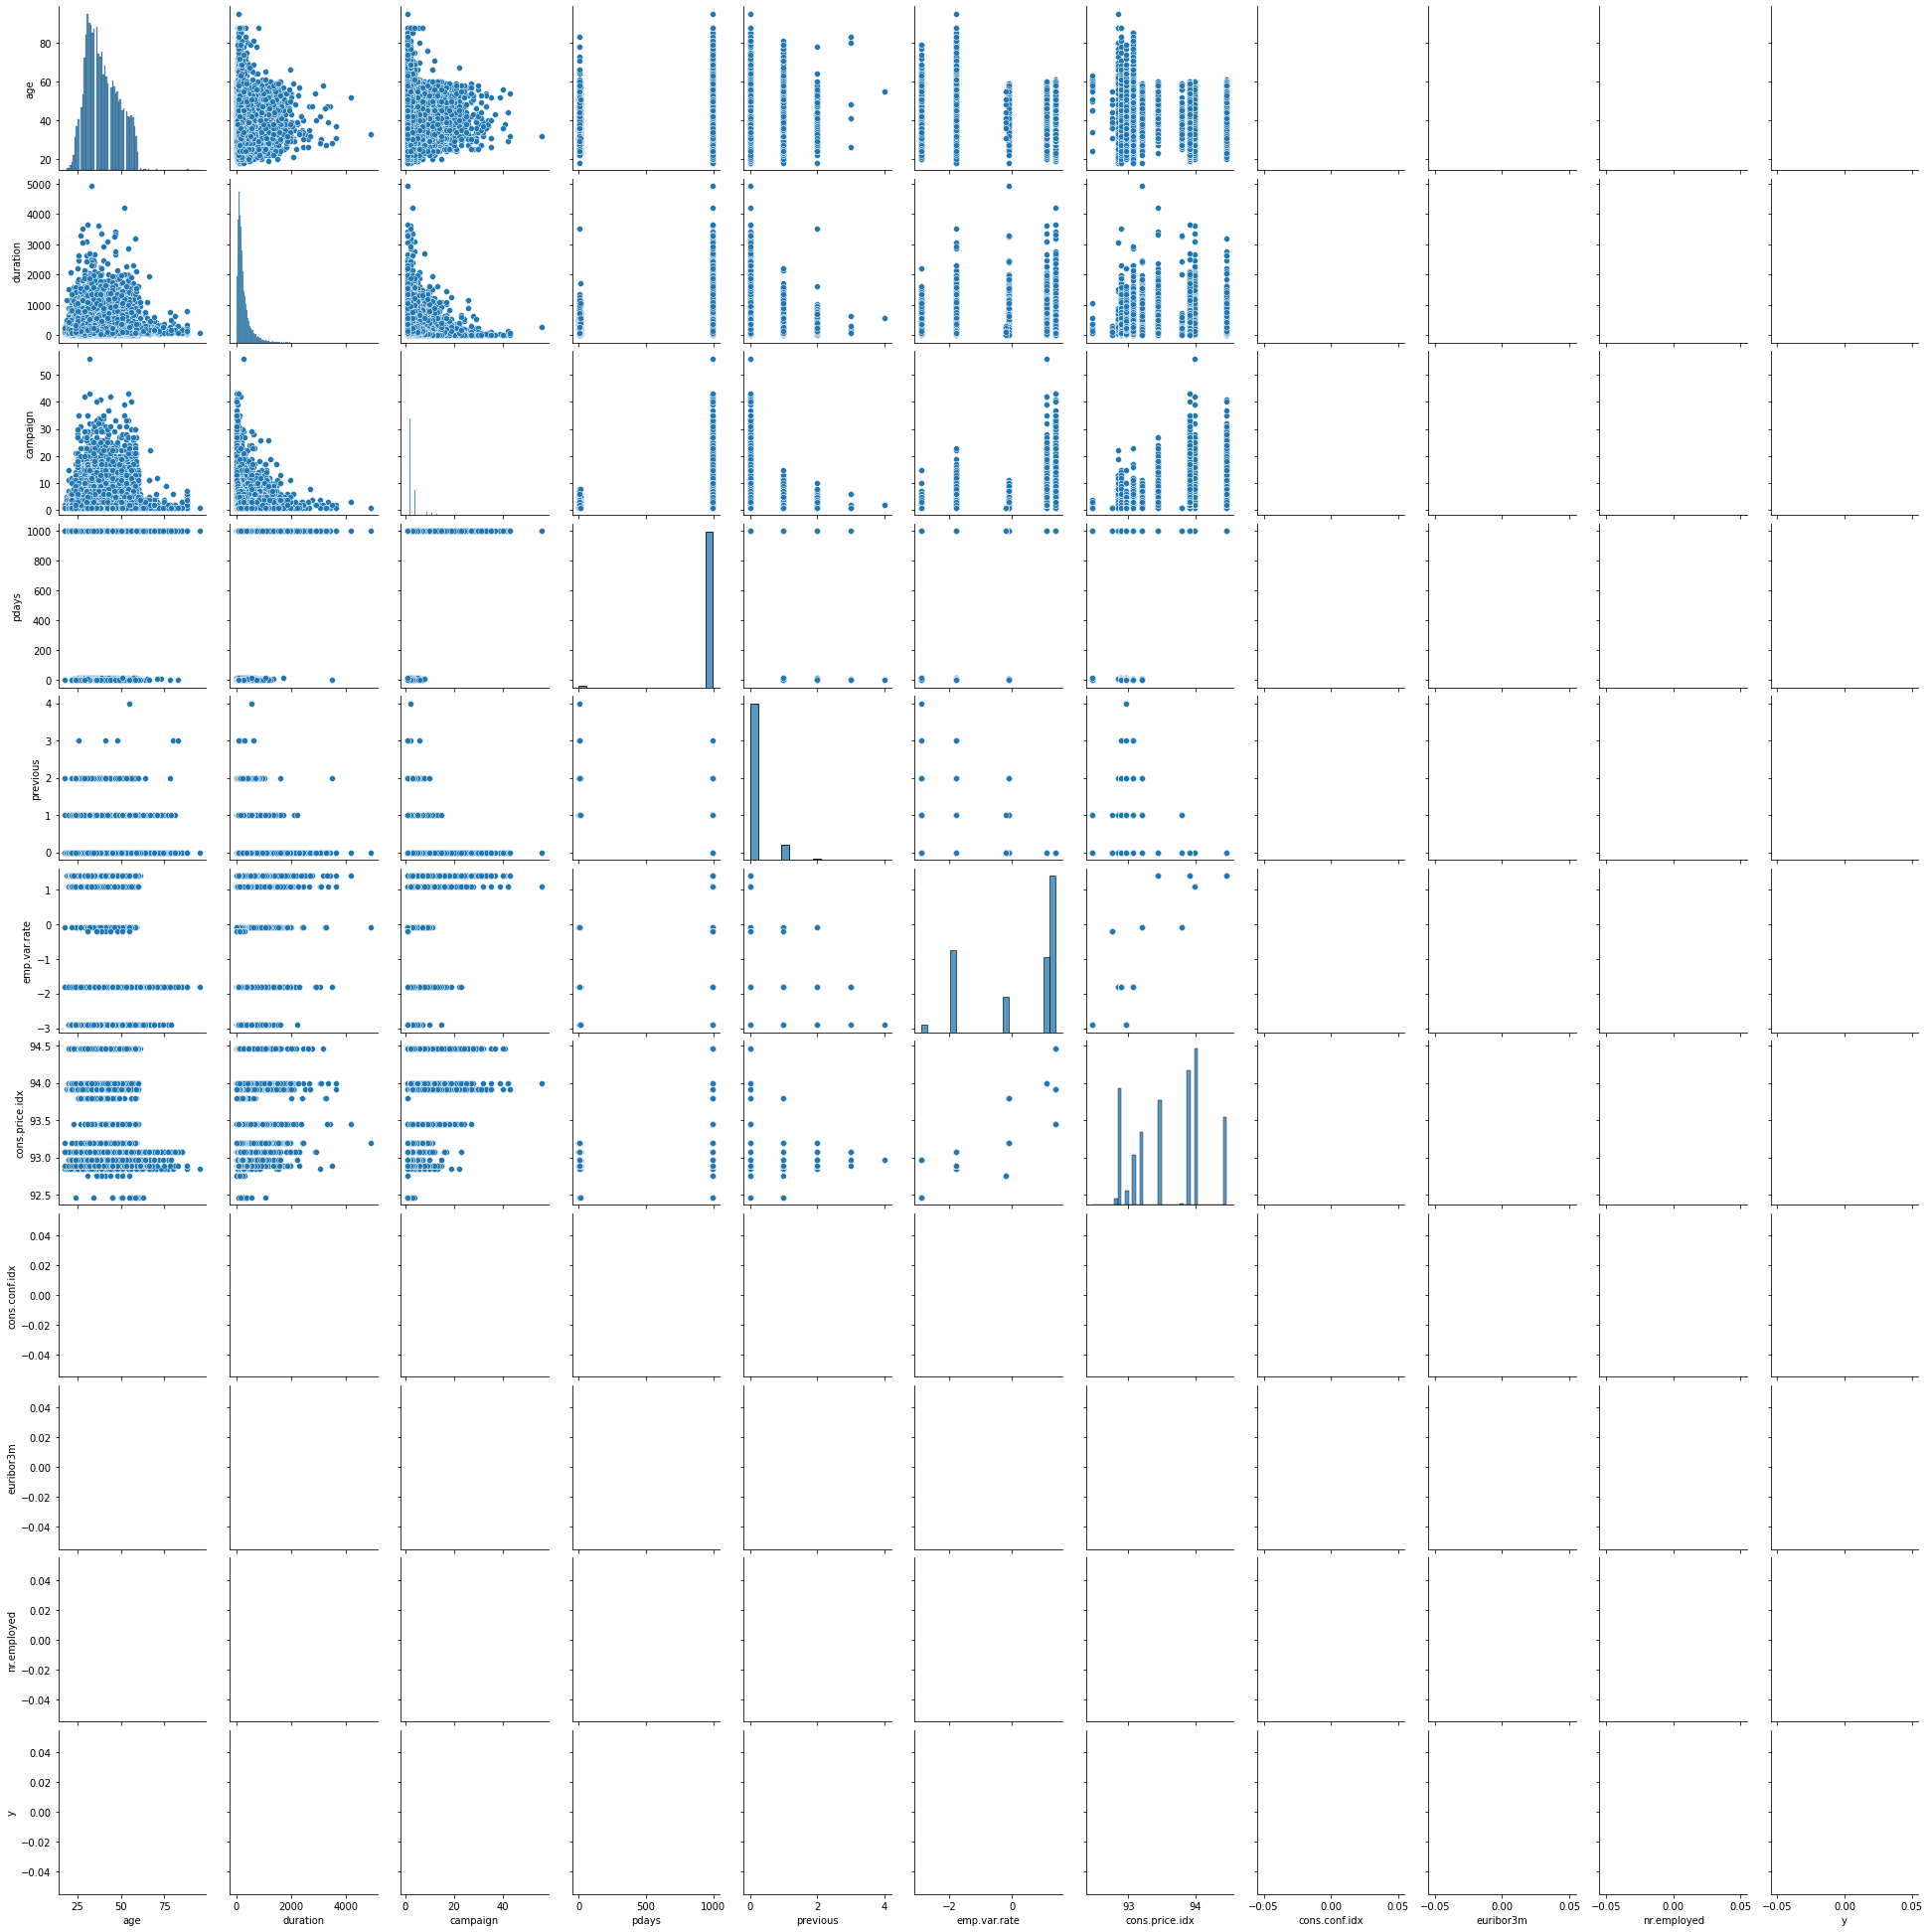

In [12]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df);

In [13]:
numeric_features=df.select_dtypes(exclude=['object'])
numeric_features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx'],
      dtype='object')

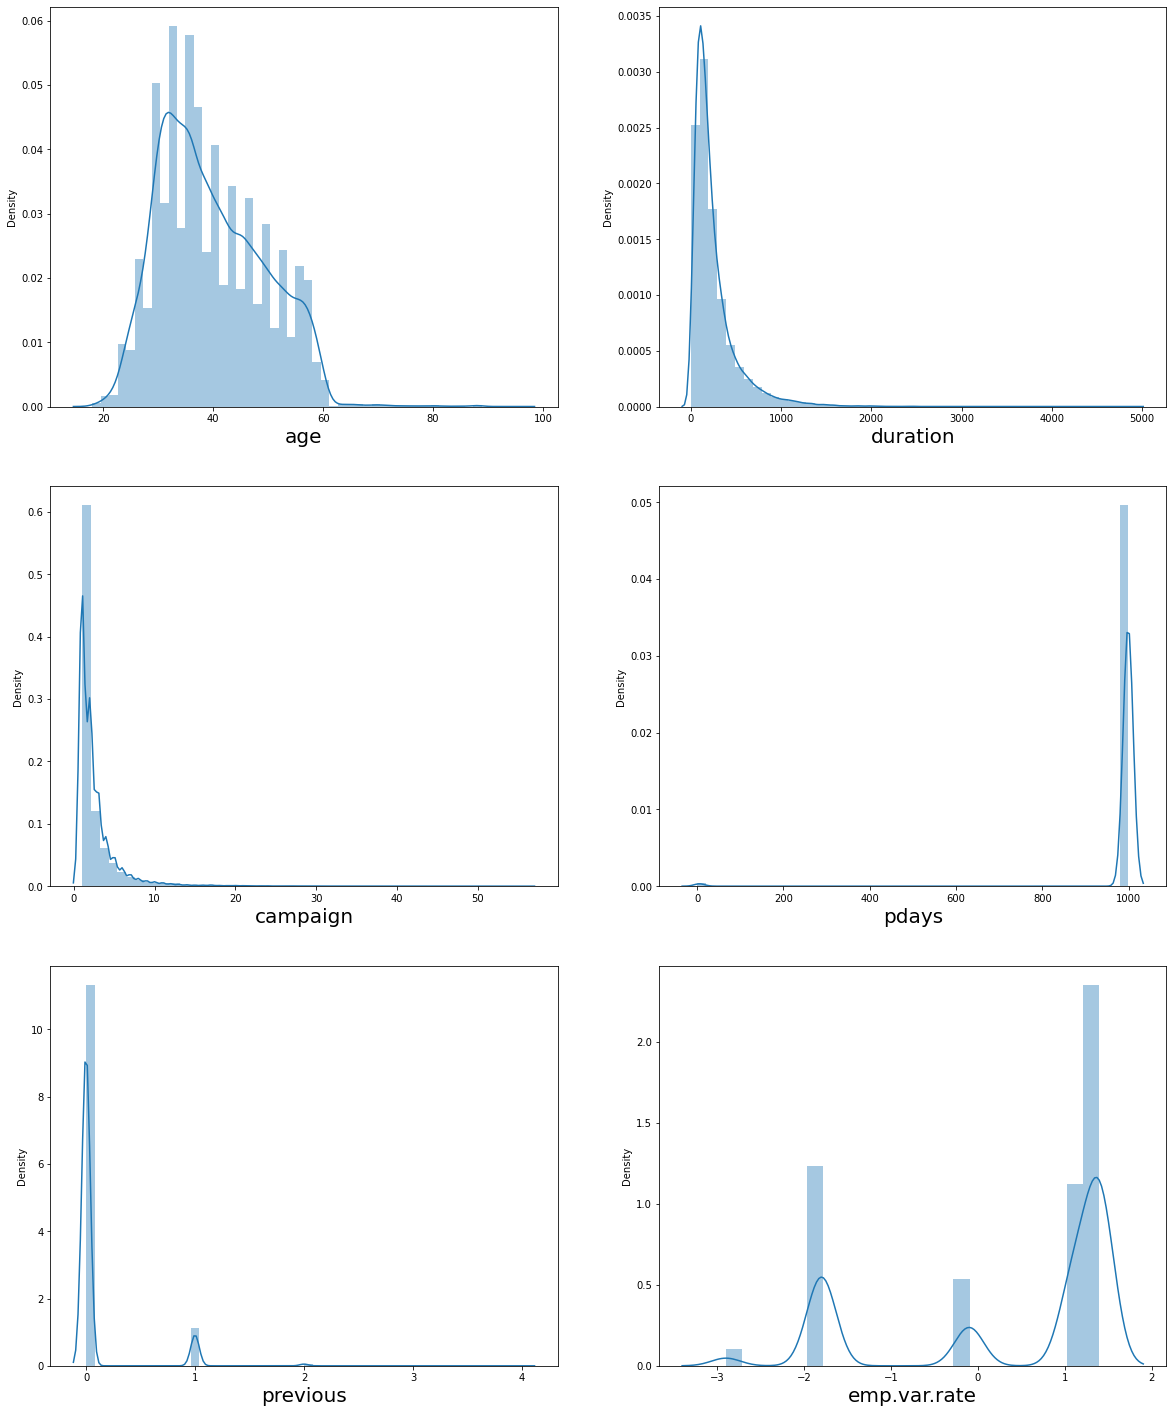

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in numeric_features:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(numeric_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

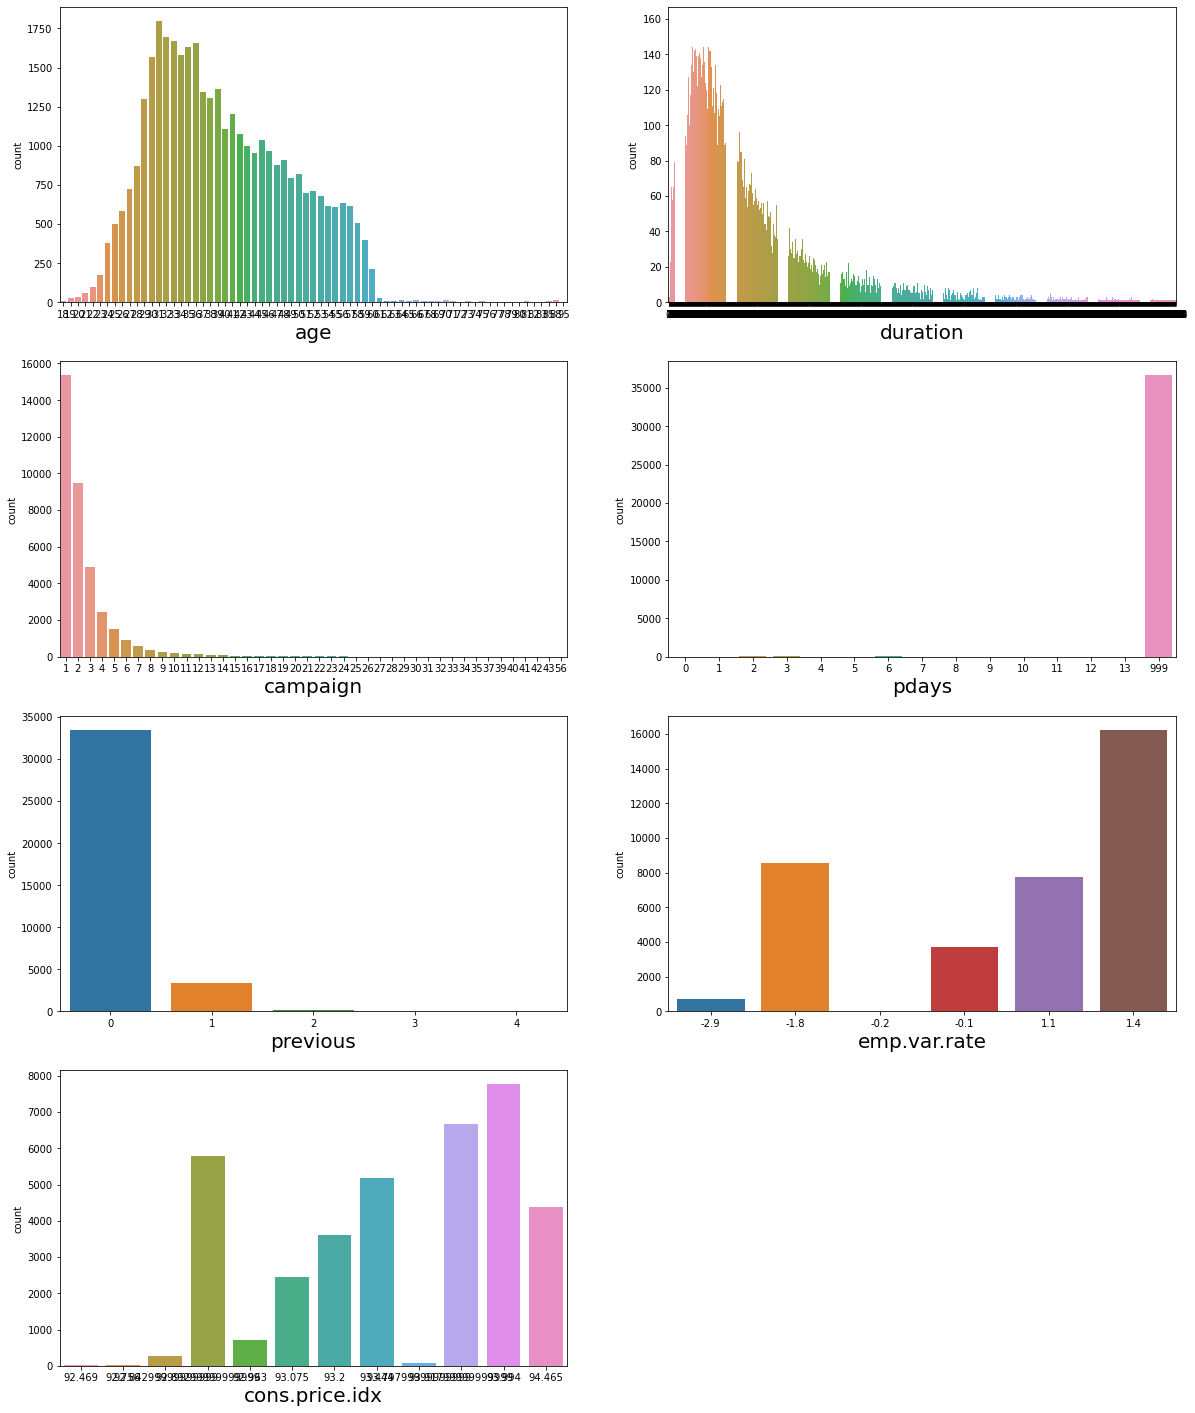

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
try:
  for c in numeric_features:
      if plotnumber<=8 :     # as there are 7 columns in the data
          ax = plt.subplot(4,2,plotnumber)
          sns.countplot(numeric_features[c])
          plt.xlabel(c,fontsize=20)
      plotnumber+=1
  plt.show()
except ValueError as ve:
  pass

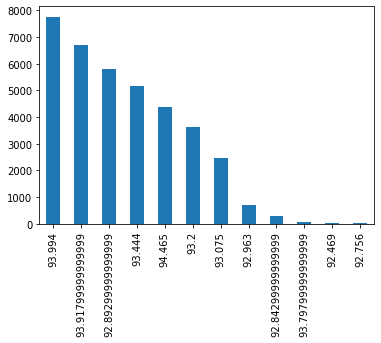

In [16]:
df['cons.price.idx'].value_counts().plot(kind="bar")

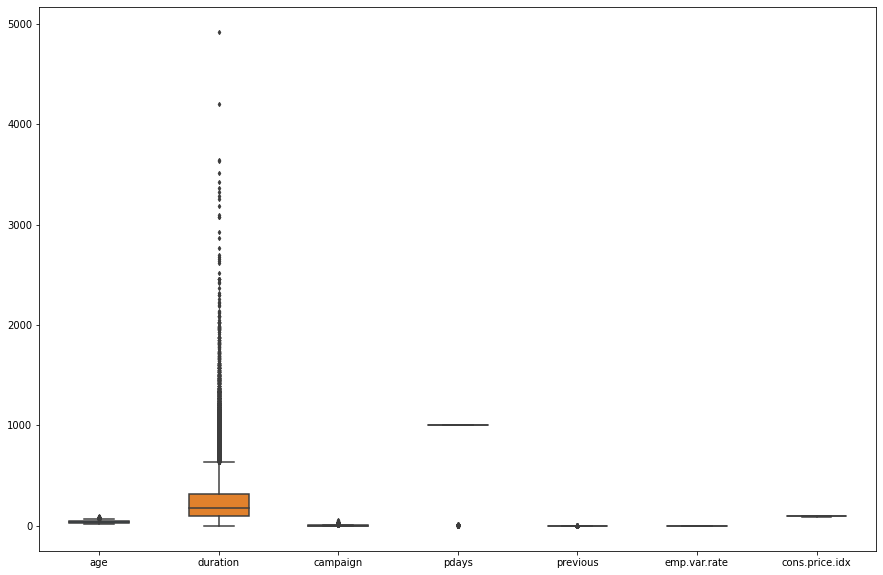

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=numeric_features, width= 0.5,ax=ax,  fliersize=3)

In [18]:
categorical_features=df.select_dtypes(include=['object'])
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

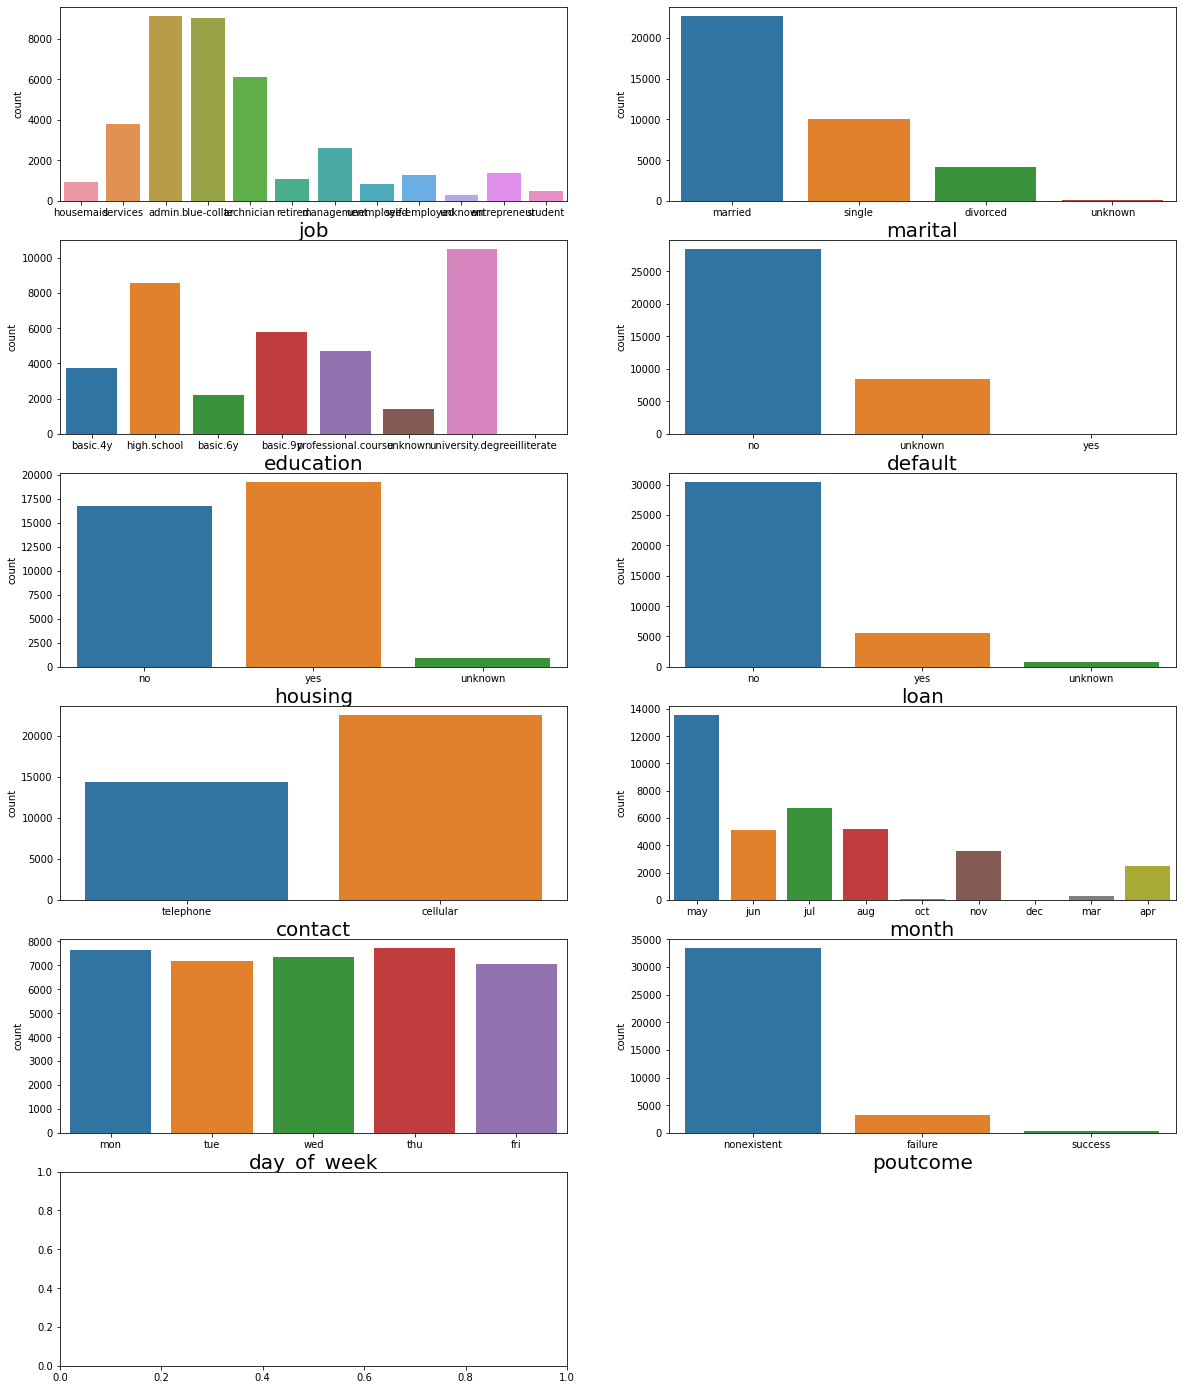

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
try:
  for c in categorical_features:
      if plotnumber<=12 :     # as there are 9 columns in the data
          ax = plt.subplot(6,2,plotnumber)
          sns.countplot(categorical_features[c])
          plt.xlabel(c,fontsize=20)
      plotnumber+=1
  plt.show()
except ValueError as ve:
  pass

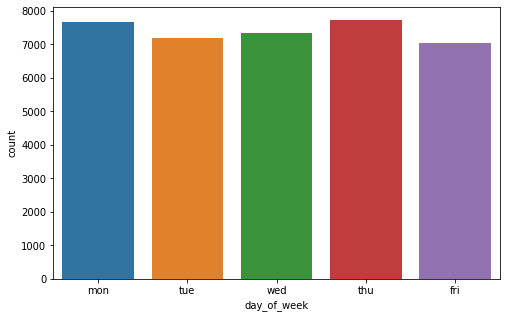

In [20]:
rcParams['figure.figsize'] = 8,5
sns.countplot(x=df['day_of_week'])

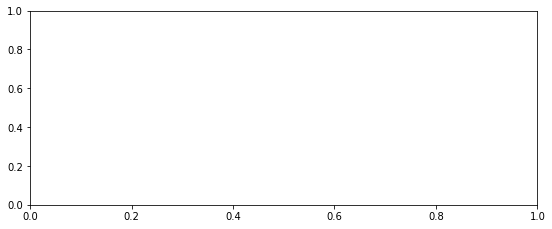

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
try:
  for c in categorical_features:
      if plotnumber<=12 :     # as there are 9 columns in the data
          ax = plt.subplot(6,2,plotnumber)
          sns.countplot(x=categorical_features[c],hue=df['y'],palette="Set2")
          plt.xlabel(c,fontsize=20)
      plotnumber+=1
  plt.show()
except ValueError as ve:
  pass



#rcParams['figure.figsize'] = 17,10
#sns.countplot(x=categorical_features[c],hue=df['y'],palette="Set2")

In [22]:
categorical_features.nunique()

job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month             9
day_of_week       5
poutcome          3
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
for col in categorical_features:
  print(df[col].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
[None]
[None]
[None]
[None]


To check on the distribution on our target feature y , we use value_counts().

In [57]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [25]:
df['y'].value_counts(normalize=True)

Series([], Name: y, dtype: float64)

We normalized the function to get the fraction for each distribution of the total, where 88.7% claim to be loyal to bak and 11.2% do not.

In [58]:
new_df = df.copy(deep=True)

In [59]:
#from sklearn import preprocessing
le = preprocessing.LabelEncoder()           
  
# job
le.fit(new_df['job'])
new_df['job'] = le.transform(new_df['job'])

# maritial feature
le.fit(new_df['marital'])
new_df['marital'] = le.transform(new_df['marital'])

# education_feature
le.fit(new_df['education'])
new_df['education'] = le.transform(new_df['education'])

# default_feature
le.fit(new_df['default'])
new_df['default'] = le.transform(new_df['default'])

# housing_feature
le.fit(new_df['housing'])
new_df['housing'] = le.transform(new_df['housing'])

# loan_feature
le.fit(new_df['loan'])
new_df['loan'] = le.transform(new_df['loan'])

# contact_feature
le.fit(new_df['contact'])
new_df['contact'] = le.transform(new_df['contact'])

# Month_feature
le.fit(new_df['month'])
new_df['month'] = le.transform(new_df['month'])

# day of week_feature
le.fit(new_df['day_of_week'])
new_df['day_of_week'] = le.transform(new_df['day_of_week'])

# poutcome_feature
le.fit(new_df['poutcome'])
new_df['poutcome'] = le.transform(new_df['poutcome'])

#cons.conf.idx feature
le.fit(new_df['cons.conf.idx'])
new_df['cons.conf.idx'] = le.transform(new_df['cons.conf.idx'])

#euribor3m feature
le.fit(new_df['euribor3m'])
new_df['euribor3m'] = le.transform(new_df['euribor3m'])

#nr.employed feature
le.fit(new_df['nr.employed'])
new_df['nr.employed'] = le.transform(new_df['nr.employed'])

#y feature
le.fit(new_df['y'])
new_df['y'] = le.transform(new_df['y'])

In [61]:
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,16,287,8,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,16,287,8,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,16,287,8,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,16,287,8,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,16,287,8,0


In [29]:
correleation_matrix = new_df.corr()

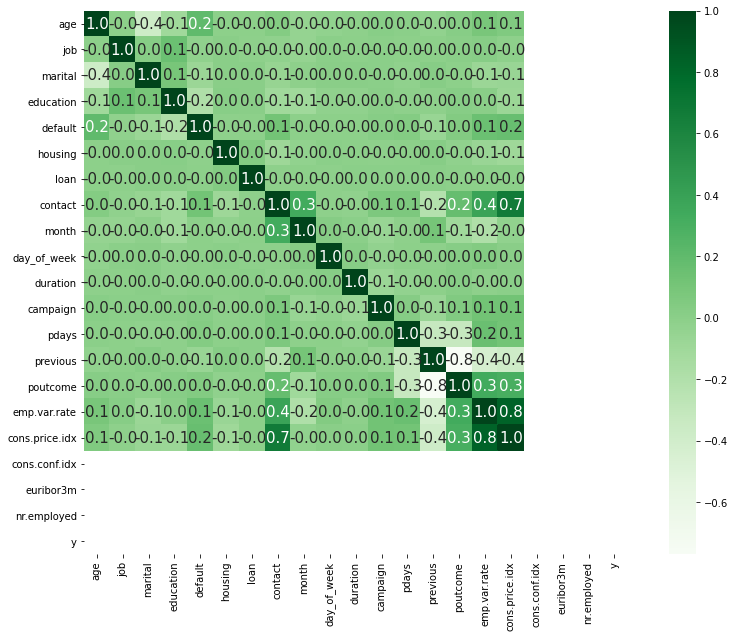

In [30]:
rcParams['figure.figsize'] = 15,10
sns.heatmap(correleation_matrix, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

From this co relation matrix we can find emp.var.rate,cons.proce.idx,euribor3m and nr.employed are more correlated to target column

In [62]:
y = new_df['y']
x = new_df.drop(['y'],axis=1)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,22.5,age
1,2.1,job
2,5.5,marital
3,4.3,education
4,1.4,default
5,2.2,housing
6,1.2,loan
7,2.5,contact
8,6.0,month
9,3.1,day_of_week


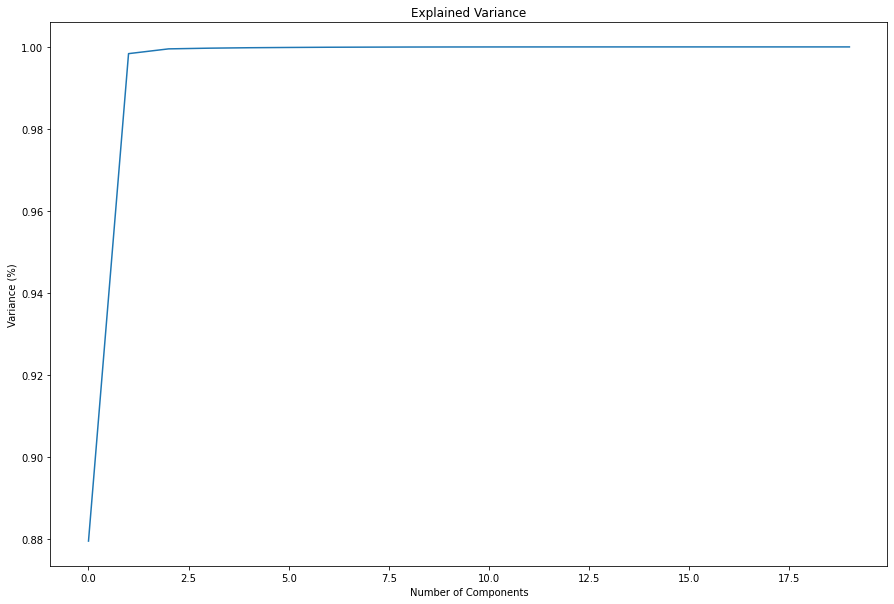

In [33]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [34]:
#pca = PCA(n_components=4)
#new_data = pca.fit_transform(x)

#principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4')

In [63]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20, random_state=42)

In [64]:
lr=linear_model.LogisticRegression()

In [65]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
acc_log_lr = round(lr.score(X_train, y_train) * 100, 2)
acc_log_lr

90.84

In [67]:
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



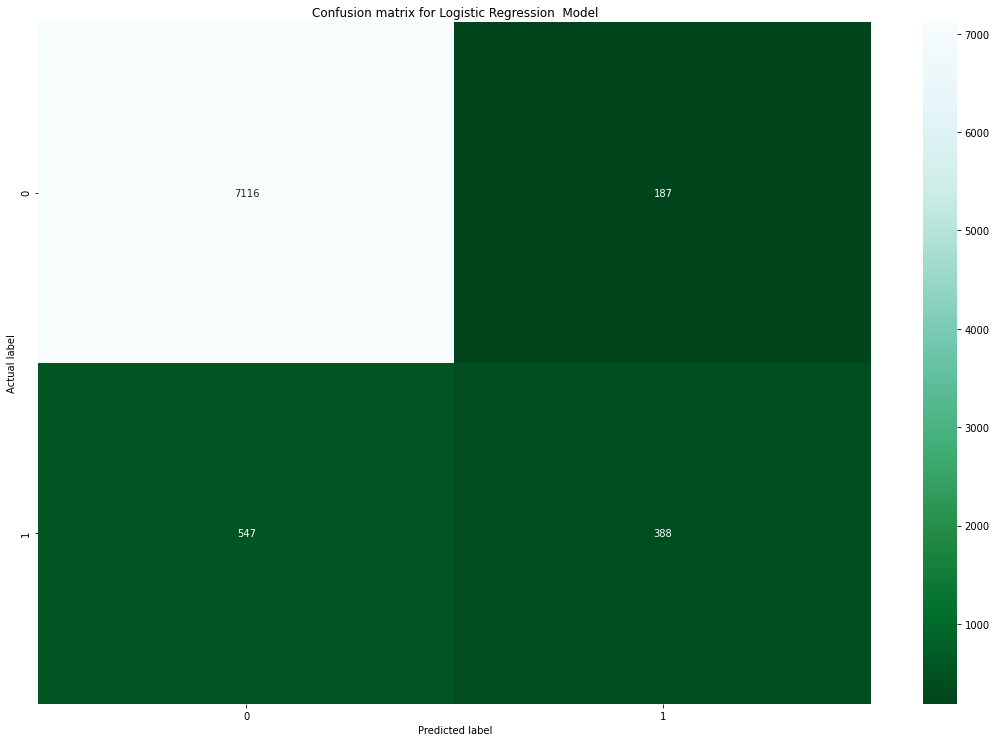

In [69]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Random Forest

In [70]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [72]:
acc_random_forest

100.0

In [74]:
print(classification_report(y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



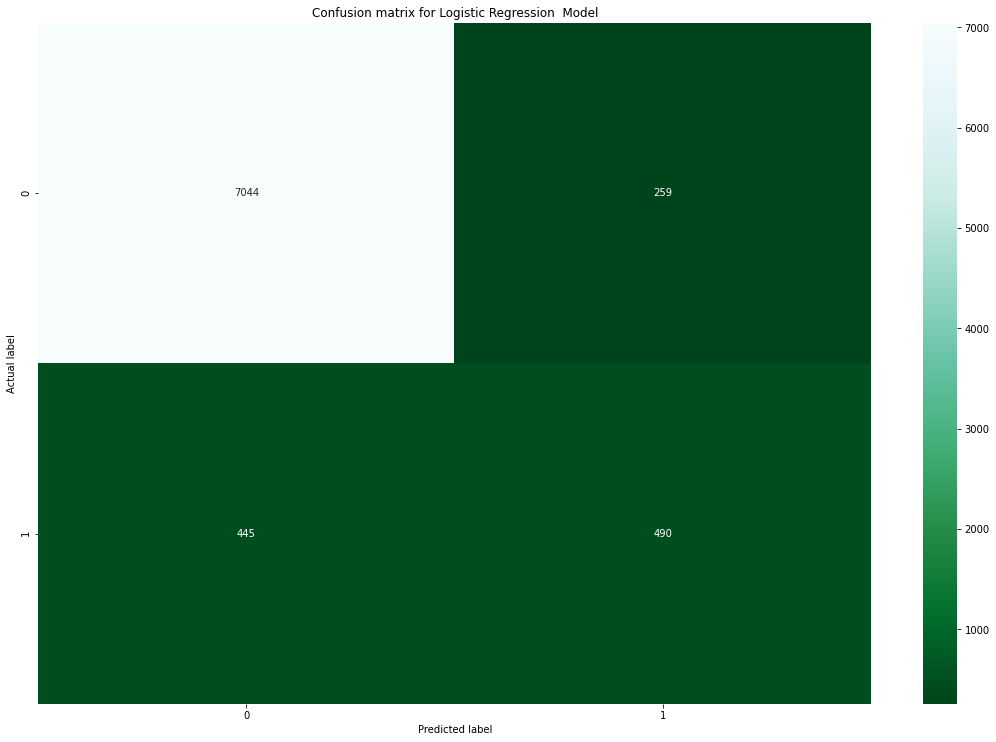

In [76]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Y_prediction)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()